# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 训练和可视化决策树

## 训练决策树

In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:]
X[:5]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [43]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [44]:
y=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2，random_state=42)
tree_clf.fit(X,y)

SyntaxError: invalid character in identifier (Temp/ipykernel_26300/2378049208.py, line 3)

## 决策树可视化

In [45]:
%conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


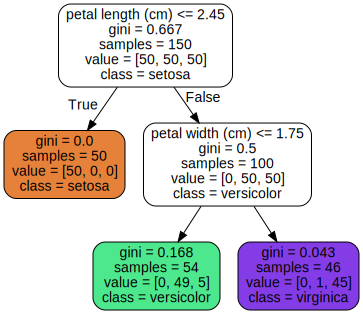

In [6]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

在cmd上运行dot -Tpng iris_tree.dot -o iris_tree.png将dot文件转为多种格式

# 做出预测

显示决策边界

In [46]:
import numpy as np
from matplotlib.colors import ListedColormap
axes=[0, 7.5, 0, 3]
x1s = np.linspace(axes[0], axes[1], 100) #0到7.5分割成100份
x1s

array([0.        , 0.07575758, 0.15151515, 0.22727273, 0.3030303 ,
       0.37878788, 0.45454545, 0.53030303, 0.60606061, 0.68181818,
       0.75757576, 0.83333333, 0.90909091, 0.98484848, 1.06060606,
       1.13636364, 1.21212121, 1.28787879, 1.36363636, 1.43939394,
       1.51515152, 1.59090909, 1.66666667, 1.74242424, 1.81818182,
       1.89393939, 1.96969697, 2.04545455, 2.12121212, 2.1969697 ,
       2.27272727, 2.34848485, 2.42424242, 2.5       , 2.57575758,
       2.65151515, 2.72727273, 2.8030303 , 2.87878788, 2.95454545,
       3.03030303, 3.10606061, 3.18181818, 3.25757576, 3.33333333,
       3.40909091, 3.48484848, 3.56060606, 3.63636364, 3.71212121,
       3.78787879, 3.86363636, 3.93939394, 4.01515152, 4.09090909,
       4.16666667, 4.24242424, 4.31818182, 4.39393939, 4.46969697,
       4.54545455, 4.62121212, 4.6969697 , 4.77272727, 4.84848485,
       4.92424242, 5.        , 5.07575758, 5.15151515, 5.22727273,
       5.3030303 , 5.37878788, 5.45454545, 5.53030303, 5.60606

In [8]:
x2s = np.linspace(axes[2], axes[3], 100)
x2s

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

In [9]:
x1, x2 = np.meshgrid(x1s, x2s)  #生成网格点坐标矩阵
x1

array([[0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
        7.5       ],
       [0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
        7.5       ],
       [0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
        7.5       ],
       ...,
       [0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
        7.5       ],
       [0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
        7.5       ],
       [0.        , 0.07575758, 0.15151515, ..., 7.34848485, 7.42424242,
        7.5       ]])

In [10]:
x2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03030303, 0.03030303, 0.03030303, ..., 0.03030303, 0.03030303,
        0.03030303],
       [0.06060606, 0.06060606, 0.06060606, ..., 0.06060606, 0.06060606,
        0.06060606],
       ...,
       [2.93939394, 2.93939394, 2.93939394, ..., 2.93939394, 2.93939394,
        2.93939394],
       [2.96969697, 2.96969697, 2.96969697, ..., 2.96969697, 2.96969697,
        2.96969697],
       [3.        , 3.        , 3.        , ..., 3.        , 3.        ,
        3.        ]])

In [11]:
x1.ravel()[:200]#将多维数组降位一维

array([0.        , 0.07575758, 0.15151515, 0.22727273, 0.3030303 ,
       0.37878788, 0.45454545, 0.53030303, 0.60606061, 0.68181818,
       0.75757576, 0.83333333, 0.90909091, 0.98484848, 1.06060606,
       1.13636364, 1.21212121, 1.28787879, 1.36363636, 1.43939394,
       1.51515152, 1.59090909, 1.66666667, 1.74242424, 1.81818182,
       1.89393939, 1.96969697, 2.04545455, 2.12121212, 2.1969697 ,
       2.27272727, 2.34848485, 2.42424242, 2.5       , 2.57575758,
       2.65151515, 2.72727273, 2.8030303 , 2.87878788, 2.95454545,
       3.03030303, 3.10606061, 3.18181818, 3.25757576, 3.33333333,
       3.40909091, 3.48484848, 3.56060606, 3.63636364, 3.71212121,
       3.78787879, 3.86363636, 3.93939394, 4.01515152, 4.09090909,
       4.16666667, 4.24242424, 4.31818182, 4.39393939, 4.46969697,
       4.54545455, 4.62121212, 4.6969697 , 4.77272727, 4.84848485,
       4.92424242, 5.        , 5.07575758, 5.15151515, 5.22727273,
       5.3030303 , 5.37878788, 5.45454545, 5.53030303, 5.60606

In [12]:
x2.ravel()

array([0., 0., 0., ..., 3., 3., 3.])

In [13]:
X_new = np.c_[x1.ravel(), x2.ravel()] #np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等
X_new[:200]

array([[0.        , 0.        ],
       [0.07575758, 0.        ],
       [0.15151515, 0.        ],
       [0.22727273, 0.        ],
       [0.3030303 , 0.        ],
       [0.37878788, 0.        ],
       [0.45454545, 0.        ],
       [0.53030303, 0.        ],
       [0.60606061, 0.        ],
       [0.68181818, 0.        ],
       [0.75757576, 0.        ],
       [0.83333333, 0.        ],
       [0.90909091, 0.        ],
       [0.98484848, 0.        ],
       [1.06060606, 0.        ],
       [1.13636364, 0.        ],
       [1.21212121, 0.        ],
       [1.28787879, 0.        ],
       [1.36363636, 0.        ],
       [1.43939394, 0.        ],
       [1.51515152, 0.        ],
       [1.59090909, 0.        ],
       [1.66666667, 0.        ],
       [1.74242424, 0.        ],
       [1.81818182, 0.        ],
       [1.89393939, 0.        ],
       [1.96969697, 0.        ],
       [2.04545455, 0.        ],
       [2.12121212, 0.        ],
       [2.1969697 , 0.        ],
       [2.

In [14]:
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
y_pred

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

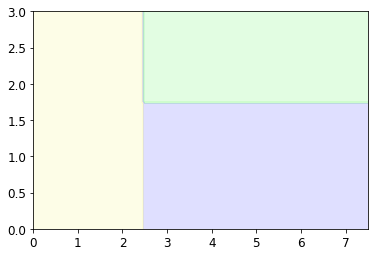

In [15]:
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap) #contour() 是绘制轮廓线，contourf()会填充轮廓

Saving figure decision_tree_decision_boundaries_plot


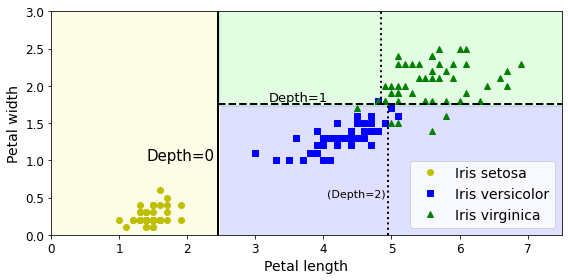

In [47]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=True, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)#等高线
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

Saving figure decision_tree_decision_boundaries_plot2


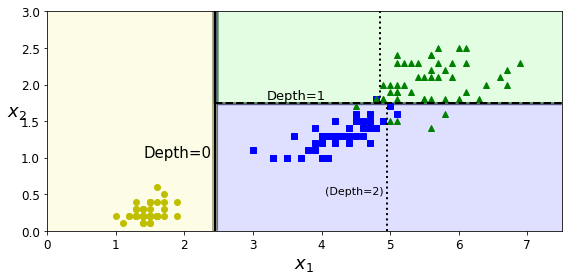

In [18]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=False, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8) #等高线
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot2")
plt.show()

# 估计类概率

In [19]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [20]:
tree_clf.predict([[5, 1.5]])

array([1])

In [21]:
tree_clf.predict_proba([[5, 1.6]])

array([[0.        , 0.90740741, 0.09259259]])

In [22]:
tree_clf.predict_proba([[6, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

# 正则化超参数

Saving figure min_samples_leaf_plot


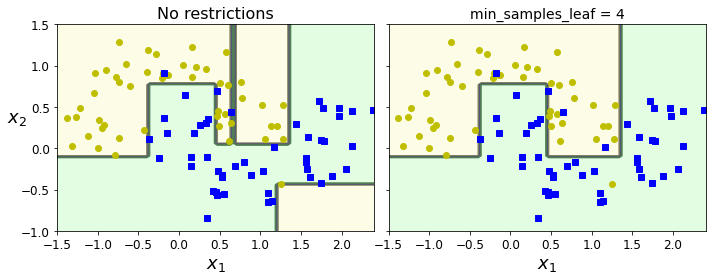

In [23]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)#创建子图，两列，坐标共享
plt.sca(axes[0])#选择子图
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")#第二张图的y值坐标去掉

save_fig("min_samples_leaf_plot")
plt.show()

Saving figure min_samples_leaf_plot1


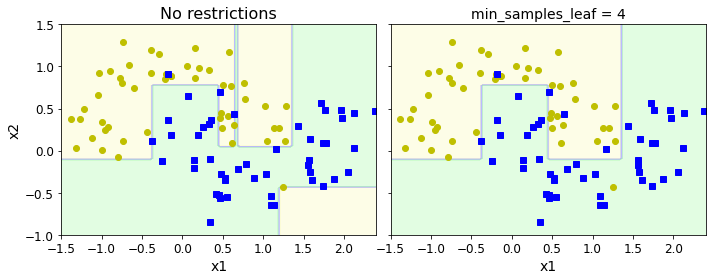

In [24]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)#创建子图，两列，坐标共享
plt.sca(axes[0])#选择子图
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=True)
plt.title("No restrictions", fontsize=16)
plt.ylabel("x2")
plt.xlabel("x1")
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=True)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.xlabel("x1")

save_fig("min_samples_leaf_plot1")
plt.show()

旋转数据集也会导致完全不同的决策边界

In [25]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [26]:
#旋转数据集
angle = np.pi / 180 * 20 #通过乘 pi/180 转化为弧度  180度为Π弧度，20度为1/9Π弧度
#三角公式里面是角度，30º、60º、360º。这样是无法带入函数的，所以用一个弧度制，把角度转化为数。这样就能从公式变成函数
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
rotation_matrix

array([[ 0.93969262, -0.34202014],
       [ 0.34202014,  0.93969262]])

In [27]:
Xr = X.dot(rotation_matrix) #点积 1*2 2*2=1*2
Xr

array([[ 1.3839737 , -0.29088968],
       [ 1.3839737 , -0.29088968],
       [ 1.29000444, -0.25668766],
       [ 1.47794296, -0.32509169],
       [ 1.3839737 , -0.29088968],
       [ 1.73428551, -0.2055572 ],
       [ 1.41817571, -0.19692041],
       [ 1.47794296, -0.32509169],
       [ 1.3839737 , -0.29088968],
       [ 1.44374095, -0.41906095],
       [ 1.47794296, -0.32509169],
       [ 1.57191222, -0.35929371],
       [ 1.34977168, -0.38485894],
       [ 1.0678639 , -0.2822529 ],
       [ 1.19603517, -0.22248565],
       [ 1.54634699, -0.13715317],
       [ 1.35840846, -0.06874914],
       [ 1.41817571, -0.19692041],
       [ 1.7000835 , -0.29952646],
       [ 1.51214497, -0.23112243],
       [ 1.66588148, -0.39349572],
       [ 1.54634699, -0.13715317],
       [ 1.00809665, -0.15408162],
       [ 1.76848753, -0.11158793],
       [ 1.85382001, -0.46189975],
       [ 1.57191222, -0.35929371],
       [ 1.64031625, -0.17135518],
       [ 1.47794296, -0.32509169],
       [ 1.3839737 ,

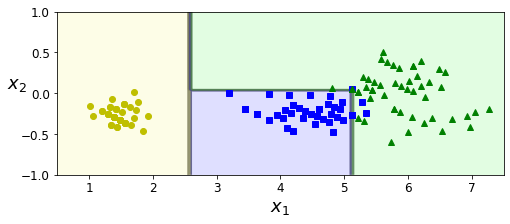

In [28]:
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

# 回归

In [29]:
#在一个二次数据集上进行回归
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10 #加噪音

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

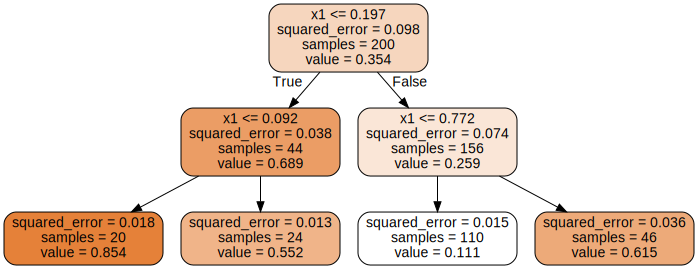

In [31]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

Saving figure tree_regression_plot


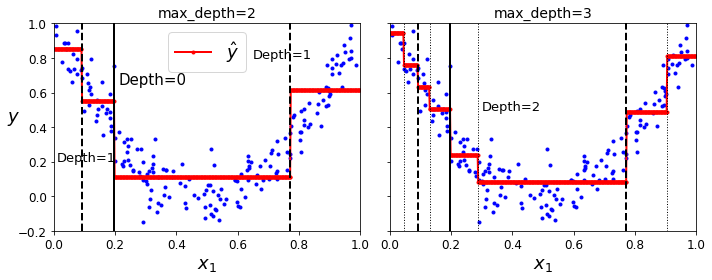

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"): #建立一个绘制回归线、添加实例的方法
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1) #预测的回归线
    plt.axis(axes)#坐标轴刻度范围
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel: #y值坐标存在，定义坐标轴标签的格式
        plt.ylabel(ylabel, fontsize=18, rotation=0) #旋转为0
    plt.plot(X, y, "b.") #绘出实例点
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$") #绘出回归线

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):#绘制depth线
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18) #在正上方显示标签
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")): #绘制depth线
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

In [33]:
tree_reg1.predict([[0]])

array([0.85389715])

In [34]:
tree_reg1.predict([[0.017]])

array([0.85389715])

Text(0.5, 1.0, 'min_samples_leaf=10')

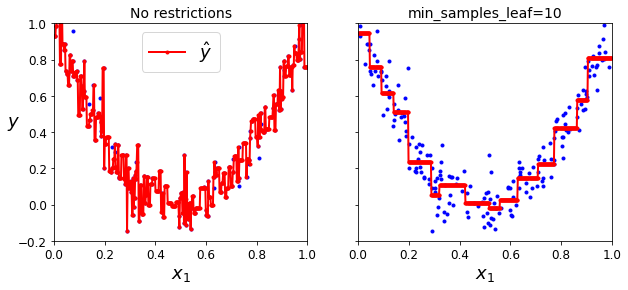

In [37]:
tree_reg3 = DecisionTreeRegressor(random_state=42)
tree_reg4 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg3.fit(X, y)
tree_reg4.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg3, X, y)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)
plt.sca(axes[1])
plot_regression_predictions(tree_reg4, X, y,ylabel=None)
plt.title("min_samples_leaf={}".format(tree_reg4.min_samples_leaf), fontsize=14)

label命名："$x_1$"，"$y$", $\hat{y}$

# 不稳定性

决策树的主要问题使它们对训练数据集中的小变化非常敏感，去掉一个值重新训练就有可能截然不同的决策树，即使用相同的数据集也有可能得到不同的模型，除非用random_state进行设置。

In [39]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:]
y=iris.target

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40) #不是42
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


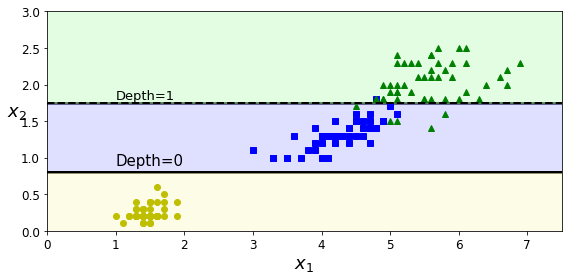

In [40]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

决策树喜欢正交的决策边界，这使它们对训练集旋转敏感

In [49]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2 #大于0的乘以2，其他为0，浮点数为32
Xs

array([[ 0.39286015, -0.16802019],
       [ 0.32122912, -0.45830337],
       [-0.39234332,  0.09505206],
       [ 0.02981736, -0.08119257],
       [-0.16459215,  0.12251943],
       [-0.06185857,  0.23588211],
       [ 0.01803641,  0.0788586 ],
       [ 0.1453551 ,  0.49022427],
       [ 0.3198582 , -0.08679907],
       [ 0.37626766,  0.32375943],
       [-0.44552549,  0.21863724],
       [ 0.30217056,  0.23640664],
       [ 0.20913175,  0.04093685],
       [-0.37517583,  0.4576473 ],
       [-0.0967437 , -0.28304884],
       [ 0.21727585,  0.49420744],
       [-0.24438594,  0.17130943],
       [ 0.09900591,  0.21733215],
       [ 0.43734953, -0.14819023],
       [-0.2463659 , -0.09752749],
       [ 0.24651072,  0.22407057],
       [-0.0938922 ,  0.48937985],
       [-0.04950072, -0.12619157],
       [ 0.20962861, -0.41754145],
       [-0.10162708,  0.27088097],
       [ 0.26475098, -0.21614062],
       [-0.31045781, -0.02874904],
       [-0.16519396,  0.23473504],
       [-0.31089288,

In [50]:
ys

array([2., 2., 0., 2., 0., 0., 2., 2., 2., 2., 0., 2., 2., 0., 0., 2., 0.,
       2., 2., 0., 2., 0., 0., 2., 0., 2., 0., 0., 0., 2., 2., 2., 2., 0.,
       2., 0., 0., 2., 0., 0., 0., 2., 2., 2., 2., 0., 0., 0., 2., 2., 2.,
       0., 0., 0., 2., 2., 2., 2., 0., 0., 2., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 2., 0., 2., 2., 0., 0., 0., 2., 0., 0., 2., 0., 0., 2.,
       0., 2., 0., 0., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0., 2.],
      dtype=float32)

Saving figure sensitivity_to_rotation_plot


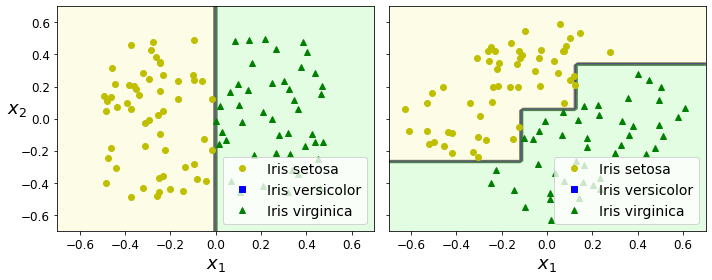

In [52]:
angle = np.pi /4 #45度
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]) #数据集旋转45度
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# 练习题

## 用决策树训练卫星数据集并微调

a.使用make_moons(n_samples=10000, noise=0.4)生成一个卫星数据集。
添加random_state=42使这个笔记本的输出为常量:

In [53]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

b.使用train_test_split()将其拆分为训练集和测试集

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

c.使用交叉验证的网格搜索(在GridSearchCV类的帮助下)为DecisionTreeClassifier找到好的超参数值。提示:尝试max_leaf_nodes的各种值。

In [56]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [57]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

In [58]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

d.使用这些超参数在完整的训练集上训练它，并测量模型在测试集上的性能。你应该得到大约85%到87%的准确度。

默认情况下，GridSearchCV会训练在整个训练集上找到的最佳模型(你可以通过设置refit=False来改变这一点)，所以我们不需要再做一次。我们可以简单地评估模型的准确性:

In [59]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

## 种植森林

a.继续前面的练习，生成1000个训练集的子集，每个子集包含随机选择的100个实例。提示:你可以使用Scikit-Learn的shufflessplit类。

In [68]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000 #1000个子集
n_instances = 100 #每个子集100个实例

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42) #划分训练集与测试集的次数，测试集比例或样本数量
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [69]:
mini_sets[:20]

[(array([[-3.15325488e-01,  4.94322659e-01],
         [ 1.07395888e+00, -3.83006874e-01],
         [ 1.23368080e+00, -2.02727544e-01],
         [ 1.45327595e+00, -4.97650493e-01],
         [ 6.29403125e-01, -4.58057181e-01],
         [ 1.31621613e+00, -4.96340629e-01],
         [ 6.61605020e-01, -5.25120656e-01],
         [ 1.17772151e+00,  2.12896730e-01],
         [ 1.27074026e+00,  8.37618484e-01],
         [ 2.40777741e-01, -4.05280317e-01],
         [ 2.09601211e+00,  2.29976411e-01],
         [ 3.96488095e-01, -3.07170096e-01],
         [-7.76673348e-01,  1.98996929e-01],
         [-8.88960092e-01,  1.06022488e+00],
         [ 1.21458297e+00, -3.55536724e-01],
         [ 1.72720880e+00,  3.94406303e-01],
         [ 1.96647532e+00,  2.91551342e-01],
         [-2.00602385e-01,  4.62530417e-02],
         [-1.19424550e+00,  1.64842526e-01],
         [-2.98171028e-01,  4.07082497e-01],
         [ 2.07327094e+00,  2.02547469e-02],
         [-7.43875589e-01,  1.01769167e+00],
         [

b.使用上面找到的最佳超参数值，在每个子集上训练一棵决策树。评估测试集中的这1,000个决策树。由于它们是在较小的集合上训练的，这些决策树可能会比第一棵决策树的表现更差，只有大约80%的准确率。

In [70]:
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

c.对于每个测试集实例，生成1000个决策树的预测，并只保留最频繁的预测(对此可以使用SciPy的mode()函数)。这为您提供了对测试集的多数投票预测。即对于一个实例有1000个预测，选出频繁的一个预测。

In [71]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8) #依给定的shape, 和数据类型 dtype,  返回一个一维或者多维数组，数组的元素不为空，为随机产生的数据
#int 代表有符号，uint 代表无符号，np.uint8为整数0~255
for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [72]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0) #返回在某一数组或数据区域中出现频率最多的数值

d.在测试集上评估这些预测:您应该获得比您的第一个模型略高的精度(大约高0.5 - 1.5%)。恭喜你，你已经训练了一个随机森林分类器!

In [73]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872

z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12],[13, 14, 15, 16]])    z.shape(4, 4)
z.reshape(-1)     array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])